In [1]:
import torch

from diffusers import (
    StableDiffusionPipeline,
    LCMScheduler,
)

device = "cuda" if torch.cuda.is_available() else "cpu"

/vast/yw7486/miniconda3/envs/kanji/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/vast/yw7486/miniconda3/envs/kanji/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/vast/yw7486/miniconda3/envs/kanji/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [3]:
model_id_or_path = "runwayml/stable-diffusion-v1-5"

scheduler = LCMScheduler.from_pretrained(
    model_id_or_path, subfolder="scheduler"
)

pipe = StableDiffusionPipeline.from_pretrained(
    model_id_or_path,
    scheduler=scheduler,
    torch_dtype=torch.float32,
    safety_checker=None,
    requires_safety_checker=False,
).to(device)

if torch.cuda.is_available():
    pipe.enable_xformers_memory_efficient_attention()

Loading pipeline components...:   0%|                                                                                          | 0/6 [00:00<?, ?it/s]

Loading pipeline components...: 100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 13.46it/s]


In [4]:
kanji_lora_path = "../ckpts/kanji-lora-0/pytorch_lora_weights.safetensors"
lcm_lora_path = "../ckpts/kanji-lora-lcm-0/pytorch_lora_weights.safetensors"

pipe.load_lora_weights(kanji_lora_path)
pipe.load_lora_weights(lcm_lora_path)
pipe.fuse_lora()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.13it/s]


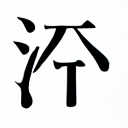

In [5]:
prompt = "water"

generator = torch.Generator(device=device).manual_seed(0)

image = pipe(
    prompt=prompt, 
    height=128,
    width=128,
    num_inference_steps=8, 
    guidance_scale=7.5,
    generator=generator,
).images[0]

display(image)